<a href="https://colab.research.google.com/github/michel-wue/Seminar/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [4]:
play_data = pd.read_csv('data_final.1.csv')

<ipython-input-6-2b6deff9dfbf>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = play_data.corr().abs()


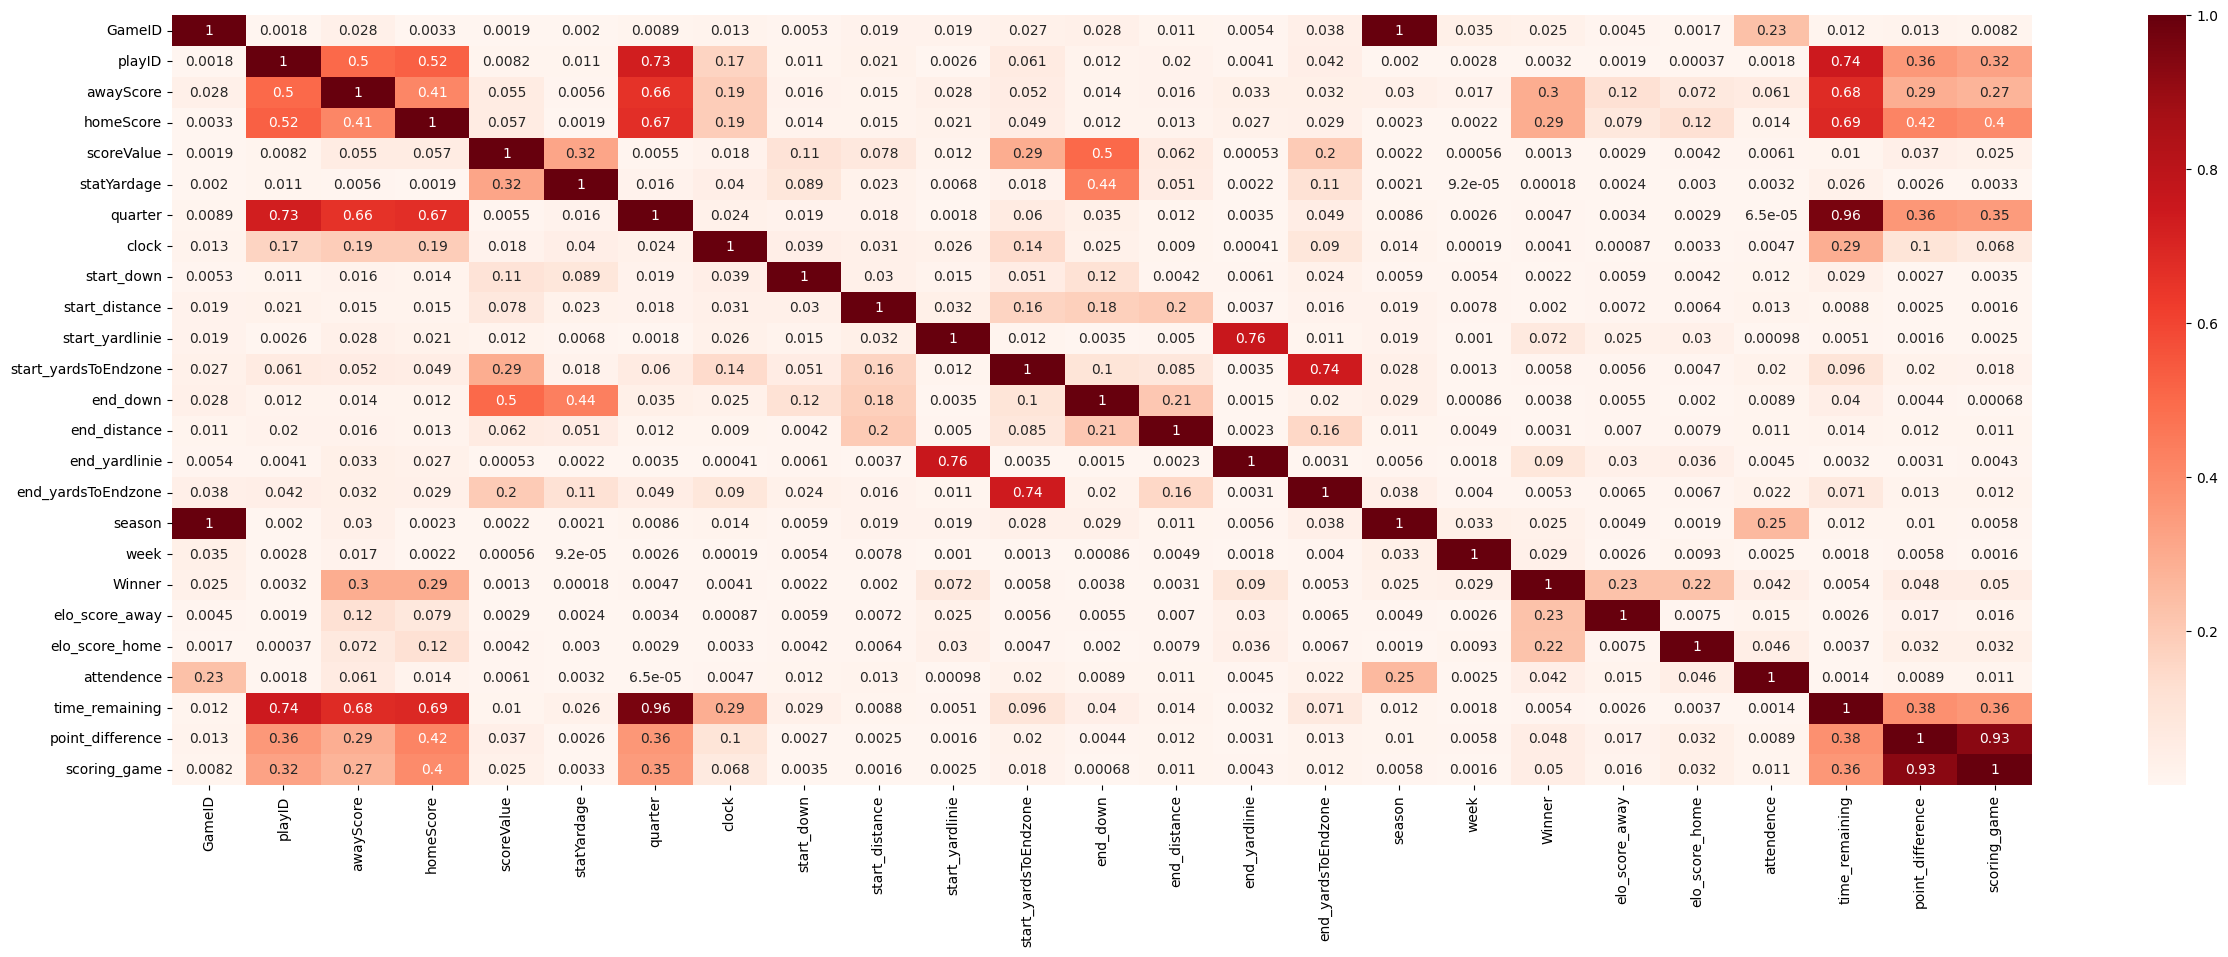

In [6]:
corr_matrix = play_data.corr().abs()
plt.figure(figsize=(30,10))
sns.heatmap(corr_matrix , annot=True, cmap="Reds")
plt.show()

In [ ]:
spieltypen_counts = play_data['type_text'].value_counts()
spieltypen_avg_yardgewinn = play_data.groupby('type_text')['statYardage'].mean()

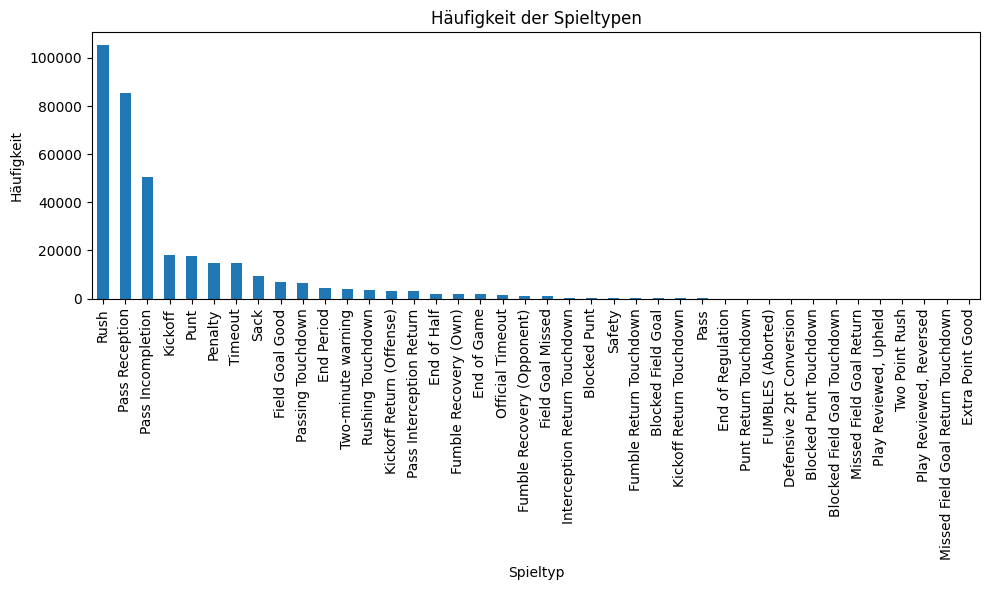

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
spieltypen_haeufigkeit = play_data['type_text'].value_counts()
plt.figure(figsize=(10, 6))
spieltypen_haeufigkeit.plot(kind='bar')
plt.xlabel('Spieltyp')
plt.ylabel('Häufigkeit')
plt.title('Häufigkeit der Spieltypen')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
play_data['type_text'].value_counts()

Rush                                  105365
Pass Reception                         85457
Pass Incompletion                      50344
Kickoff                                17908
Punt                                   17645
Penalty                                14733
Timeout                                14627
Sack                                    9191
Field Goal Good                         6729
Passing Touchdown                       6441
End Period                              4242
Two-minute warning                      4034
Rushing Touchdown                       3587
Kickoff Return (Offense)                3163
Pass Interception Return                3081
End of Half                             1842
Fumble Recovery (Own)                   1836
End of Game                             1742
Official Timeout                        1313
Fumble Recovery (Opponent)              1198
Field Goal Missed                       1186
Interception Return Touchdown            317
Blocked Pu

In [ ]:
gewuenschte_spieltypen = ['Pass Reception', 'Rush', 'Penalty', 'Sack', 'Passing Touchdown',
                         'Rushing Touchdown', 'Interception Return Touchdown',
                         'Pass Interception Return', 'Fumble Return Touchdown']
filtered_df = play_data[play_data['type_text'].isin(gewuenschte_spieltypen)]

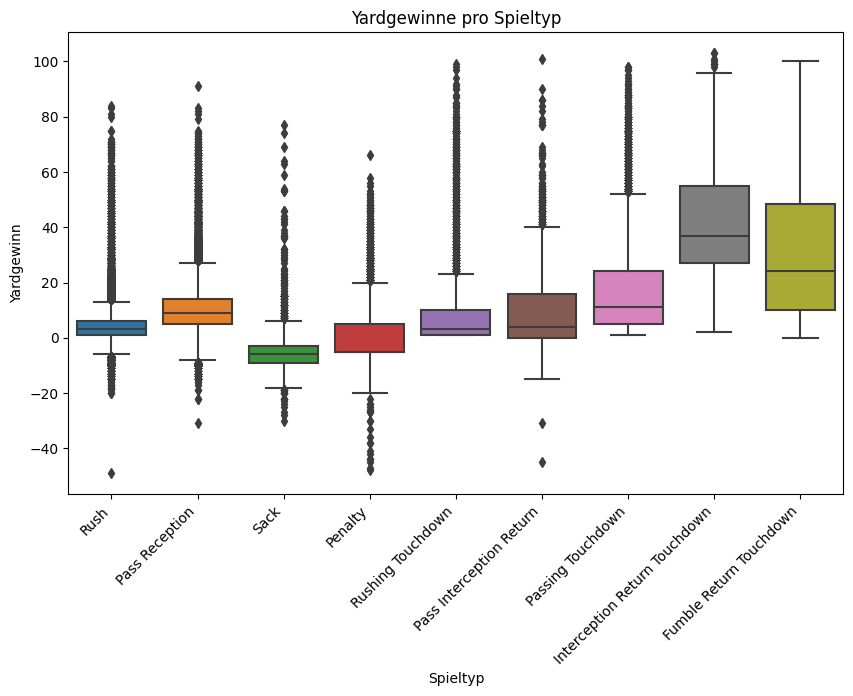

In [ ]:
plt.figure(figsize=(10, 6))
ax=sns.boxplot(x='type_text', y='statYardage', data=filtered_df)
plt.xlabel('Spieltyp')
plt.ylabel('Yardgewinn')
plt.title('Yardgewinne pro Spieltyp')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.show()

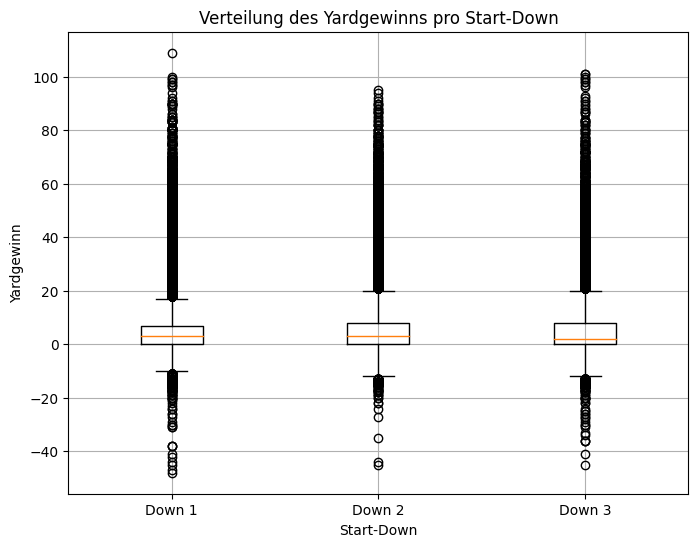

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
filtered_df = play_data[play_data['start_down'].isin([1, 2, 3])]
avg_yardgewinn_pro_down = filtered_df.groupby('start_down')['statYardage'].mean()
plt.figure(figsize=(8, 6))
plt.boxplot(filtered_df.groupby('start_down')['statYardage'].apply(list))
plt.xlabel('Start-Down')
plt.ylabel('Yardgewinn')
plt.title('Verteilung des Yardgewinns pro Start-Down')
plt.xticks(range(1, 4), ['Down 1', 'Down 2', 'Down 3'])
plt.grid(True)
plt.show()

         GameID  Winner
0     400761514       0
1     400761515       1
2     400761516       1
3     400791484       1
4     400791485       1
...         ...     ...
2073  401437959       1
2074  401437960       1
2075  401437961       0
2076  401437962       1
2077  401437963       1

[2078 rows x 2 columns]


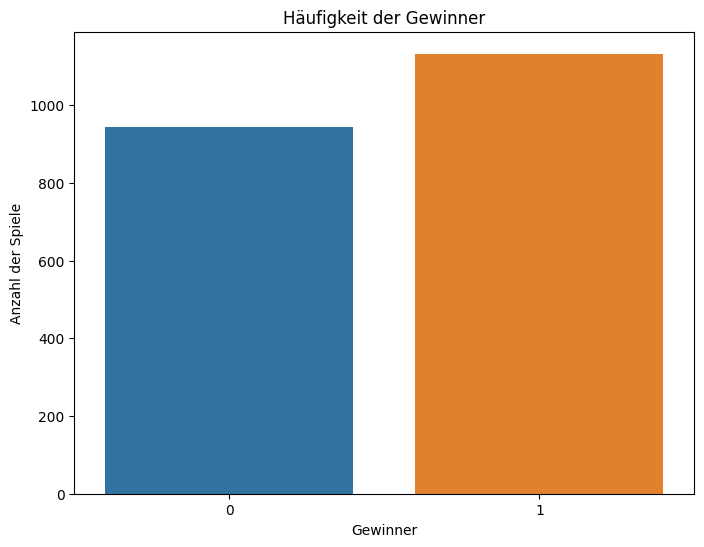

In [ ]:
gewinner_verteilung = play_data.groupby('GameID')['Winner'].value_counts().reset_index(name='Anzahl')
gewinner_verteilung = gewinner_verteilung[['GameID', 'Winner']]
print(gewinner_verteilung)
gewinner_haeufigkeit = gewinner_verteilung['Winner'].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=gewinner_haeufigkeit.index, y=gewinner_haeufigkeit.values)
plt.xlabel('Gewinner')
plt.ylabel('Anzahl der Spiele')
plt.title('Häufigkeit der Gewinner')
plt.show()

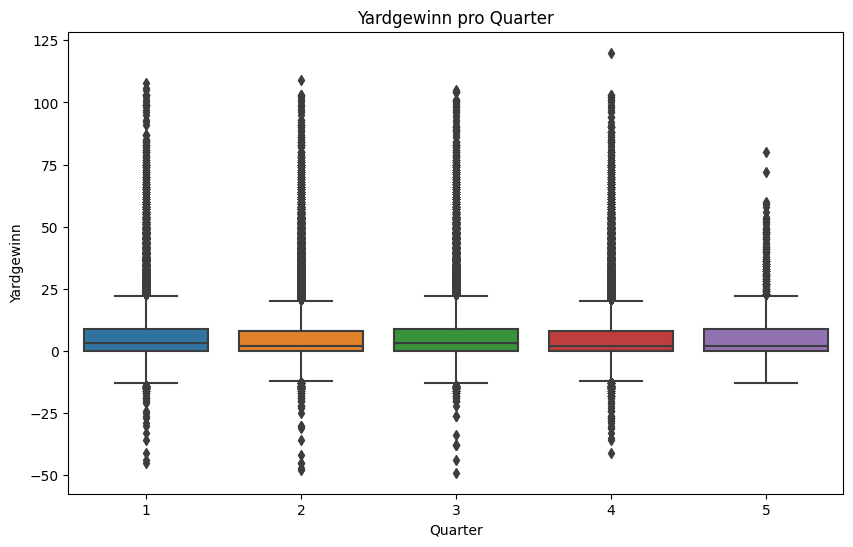

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='quarter', y='statYardage', data=play_data)
plt.xlabel('Quarter')
plt.ylabel('Yardgewinn')
plt.title('Yardgewinn pro Quarter')
plt.show()